# Likelihood failure

Assessing why the likelihood fails.

Reboot of [notebook_LLlapse_random_fitexperimentallt_sigmaxMratiolapserate_131015](../fitexperiment_allt_new_10_2015/notebook_LLlapse_random_fitexperimentallt_sigmaxMratiolapserate_131015.ipynb), where we check why some random parameters lead to wrong LL values.

Let's just check specific parameters here.

In [215]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
import collections
import os
import numpy as np
import scipy as sp
import scipy.stats as spst
import scipy.interpolate as spint
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.utils import io
import progress
import re
import inspect
import imp

from experimentlauncher import ExperimentLauncher
from dataio import DataIO

import load_experimental_data
import plots_experimental_data
import plots_paper_theo
import resultcomputation
import highdimensionnetwork
import hierarchicalrandomnetwork
import sampler_invtransf_randomfactorialnetwork

import utils

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

In [217]:
data_bays = load_experimental_data.load_data(experiment_id='bays09', fit_mixture_model=True)
dataio = DataIO(label='', 
                calling_function='', 
                output_folder=os.environ['WORKDIR_DROP'] + '/Figures/thesis/likelihood_failure')

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Bays2009/em_bays_basicmodel.pickle
reloaded collapsed mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Bays2009/collapsed_em_bays_new.pickle
=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Figures/thesis/likelihood_failure/5e23c4b6-4c4a-448d-87bc-0651b73d3932 ===


```
Best for dist_nll
[  i ] M ratio_conj sigmax lapse_rate >> dist_emfit_mse dist_emfit_kl dist_nll dist_nll90 dist_bic dist_nllnormall_geom
[1025] 545.0000 0.3101 0.0102 0.1964 >> 41367210727.4030 0.3554 -1419.1130 -2112.2368 -2738.7923 238.1139
```

In [219]:
arguments_dict = dict(
    action_to_do='launcher_do_fitexperiment_allmetrics',
    filter_datapoints_size=100,
    filter_datapoints_selection='sequential',
    bic_K=4,
    code_type='mixed',
    M=545,
    ratio_conj=0.3101,
    sigmax=0.1,
    sigma_baseline=0.3,
    renormalize_sigmax=None,
    N=200,
    R=2,
    T=6,
    sigmay=0.0001,
    sigma_output=0.0,
    lapse_rate=0.0,
    inference_method='none',
    num_samples=50,
    selection_num_samples=1,
    selection_method='last',
    slice_width=0.07,
    burn_samples=20,
    num_repetitions=1,
    enforce_min_distance=0.17,
    specific_stimuli_random_centers=None,
    stimuli_generation='random',
    stimuli_generation_recall='random',
    autoset_parameters=None,
    collect_responses=None,
    label='thesis_likelihoodfail',
    output_directory='./likelihood_failure/',
    experiment_data_dir=os.path.normpath(os.path.join(os.environ['WORKDIR_DROP'], '../../experimental_data')),
)
with io.capture_output(display=False, stdout=False) as captured:
    experiment_launcher = ExperimentLauncher(run=True, arguments_dict=arguments_dict)
    fit_exp = experiment_launcher.all_vars['fit_exp']

Arguments: ['-f', '/run/user/5201/jupyter/kernel-3ee24f45-e393-47ab-8462-f2ca99c06b93.json']

        Given a single experiment_id, will run the model on all T in the experimental data.
        Computes several metrics (LL, BIC) and can additionally sample from the model and check the Mixture model
        summary statistics fits.

        If inference_method is not none, also fits a EM mixture model, get the precision and the fisher information
    
Doing a piece of work for launcher_do_fitexperimentsinglet
{'M_layer_one': 400, 'code_type': 'mixed', 'verbose': False, 'selection_num_samples': 1, 'subaction': '', 'load_all_from_parameters_file': False, 'pylab': True, 'specific_stimuli_random_centers': True, 'enforce_min_distance': 0.17, 'result_computation': '', 'threshold': 0.0, 'slice_width': 0.07, 'rc_scale': 0.5, 'autoset_parameters': True, 'normalise_gain': False, 'job_name': '', 'experiment_data_dir': '/nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimen

In [220]:
fit_exp.setup_experimental_stimuli_T(1)
sampler = fit_exp.sampler

In [221]:
for k, v in experiment_launcher.all_vars.items():
    if 'result' in k:
        vars()[k] = v

In [222]:
result_ll_n

array([[[ 20.996475  ],
        [  6.85087114],
        [-57.11563987],
        [-17.24534536],
        [ 28.78666294],
        [-34.77163151],
        [ 19.90311939],
        [-59.13613007],
        [-60.18146004],
        [-14.53419416],
        [-25.83298581],
        [-46.93698941],
        [-45.93332069],
        [-25.18692457],
        [ 13.46149782],
        [-15.33215711],
        [-56.59662931],
        [-20.27363051],
        [-47.9858306 ],
        [ -4.02828776],
        [-41.40211307],
        [-14.17548637],
        [-44.8215899 ],
        [-23.9068743 ],
        [-63.4430226 ],
        [ -8.60189941],
        [-75.38395603],
        [-22.10916466],
        [ 20.58861738],
        [  3.14835131],
        [-18.89568439],
        [-60.31461646],
        [-32.00512555],
        [-59.91102519],
        [-15.54893329],
        [ -2.62458734],
        [-22.77499216],
        [ 13.57373055],
        [-33.34312934],
        [-41.03179782],
        [-45.47964657],
        [-30.992

In [230]:
print(np.nanmean(np.squeeze(-result_ll_n), axis=-1))
print(utils.nanmean(np.squeeze(-result_ll_n), axis=1))

[28.64156663 18.49667319 13.61508126 11.06764796]
[28.64156662779974 18.49667319333954 13.615081262048957 11.06764796178541]


In [224]:
rc = resultcomputation.ResultComputation("dist_ll_allt")
rc.compute_result(experiment_launcher.all_vars)

ResultComputation initialised
 > dist_ll_allt
7182.096904497364


7182.096904497364

In [225]:
T_space = np.unique(data_bays['n_items'])

In [226]:
ll_all_pd = collections.defaultdict(list)
for nitem_i, nitem in enumerate(T_space):
    ll = -np.squeeze(result_ll_n)[nitem_i].copy()
    ll[np.isinf(ll)] = -1e5
    ll_all_pd['nll'].extend(ll)
    ll_all_pd['nitem'].extend(np.ones_like(ll)*nitem)
ll_all_pd = pd.DataFrame(ll_all_pd)

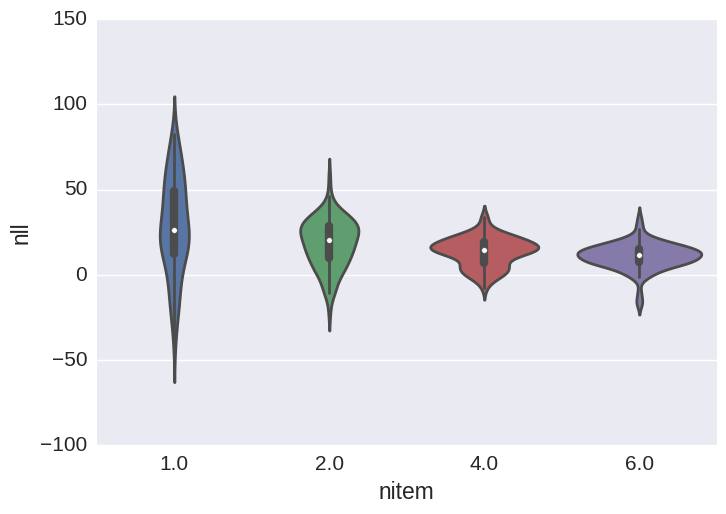

In [227]:
nll_nona = ll_all_pd.dropna()
ax = sns.violinplot(data=nll_nona, x='nitem', y='nll')
# ax.set_ylim((-200, 200))

In [229]:
print(nll_badna.sum())
nll_badna.groupby('nitem').sum()

nitem    1300.000000
nll      7182.096904
dtype: float64


,nll
nitem,
1.0,2864.156663
2.0,1849.667319
4.0,1361.508126
6.0,1106.764796
